# Business Problem

Production prediction is one of the core problems in our business. The provided dataset is a set of nearby wells located in the United States and their 12 months cumulative production. As a data scientist you want to build a model from scratch to predict production and show your manager that your model can perform well on unseen data.

# 1. Exploratory Data Analysis

In [1]:
# Import libraries 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np 
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_classif



In [2]:
# Open dataset
df = pd.read_csv('interview_dataset.csv')

## 1.1 Genreal Data Analysis

In [3]:
# list the data types for each column
print(df.dtypes)

treatment company          object
azimuth                   float64
md (ft)                     int64
tvd (ft)                  float64
date on production         object
operator                   object
footage lateral length    float64
well spacing              float64
porpoise deviation        float64
porpoise count              int64
shale footage               int64
acoustic impedance        float64
log permeability          float64
porosity                  float64
poisson ratio             float64
water saturation          float64
toc                       float64
vcl                       float64
p-velocity                float64
s-velocity                float64
youngs modulus            float64
isip                      float64
breakdown pressure        float64
pump rate                   int64
total number of stages      int64
proppant volume           float64
proppant fluid ratio      float64
production                float64
dtype: object


In [4]:
df.head()

,treatment company,azimuth,md (ft),tvd (ft),date on production,operator,footage lateral length,well spacing,porpoise deviation,porpoise count,...,p-velocity,s-velocity,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,production
0,treatment company 1,-32.279999,19148,6443.0,3/1/2018,operator 1,11966.0,4368.46290,6.33,12,...,13592.23,6950.44,30.82,4149.0,NaN,83,56,21568792.0,1.23,5614.947951
1,treatment company 2,-19.799999,15150,7602.0,7/1/2014,operator 2,6890.0,4714.99220,1.28,4,...,11735.04,7162.45,29.72,5776.0,NaN,102,33,9841307.0,1.47,2188.836707
2,treatment company 3,-26.879999,14950,5907.0,8/1/2018,operator 1,8793.0,798.92096,2.03,6,...,13227.81,6976.93,30.99,4628.0,NaN,88,62,17116240.0,1.67,1450.033022
3,treatment company 4,-49.099998,11098,6538.0,1/1/2012,operator 1,4234.0,NaN,6.00,23,...,12646.34,6799.37,26.20,4582.0,NaN,100,11,3749559.0,0.77,1060.764407
4,treatment company 5,5.560000,10549,7024.0,1/1/2012,operator 3,2972.0,2967.56300,11.87,9,...,13192.18,7046.91,31.18,4909.0,NaN,94,9,6690705.0,1.32,607.530385


In [5]:
df.tail()

,treatment company,azimuth,md (ft),tvd (ft),date on production,operator,footage lateral length,well spacing,porpoise deviation,porpoise count,...,p-velocity,s-velocity,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,production
995,treatment company 10,-15.980000,13750,7301.0,8/1/2017,operator 6,6006.0,1438.41020,6.30,7,...,13493.47,6853.18,30.59,5235.0,NaN,90,20,7062412.0,1.21,4395.234931
996,treatment company 23,-18.080000,17333,6551.0,3/1/2018,operator 4,10279.0,764.44165,2.54,17,...,13166.54,7031.03,31.14,3796.0,NaN,94,51,NaN,1.34,2263.065149
997,treatment company 4,-34.430000,19772,7598.0,10/1/2018,operator 4,11568.0,569.40991,6.73,8,...,12587.95,7250.19,32.20,5751.0,NaN,88,58,21720556.0,1.14,4094.018209
998,treatment company 5,-28.540001,11920,5475.0,8/1/2018,operator 22,5929.0,NaN,6.44,7,...,13507.64,6877.28,30.66,4339.0,NaN,100,32,13430880.0,0.95,1000.295063
999,treatment company 9,-37.480000,15342,6555.0,1/1/2014,operator 14,7235.0,3987.16670,81.17,3,...,12187.11,6767.81,28.09,NaN,6061.0,82,39,14672616.0,1.08,7114.217446


In [6]:
# Dataframe's number of rows and columns
df.shape

(1000, 28)

In [7]:
# Getting mean null values in each column
df.isnull().mean().sort_values(ascending=True)

treatment company         0.000
total number of stages    0.000
pump rate                 0.000
s-velocity                0.000
p-velocity                0.000
vcl                       0.000
poisson ratio             0.000
proppant fluid ratio      0.000
log permeability          0.000
acoustic impedance        0.000
production                0.000
porpoise count            0.000
porpoise deviation        0.000
md (ft)                   0.000
footage lateral length    0.000
shale footage             0.000
operator                  0.000
date on production        0.000
youngs modulus            0.019
tvd (ft)                  0.020
toc                       0.021
azimuth                   0.055
isip                      0.077
porosity                  0.119
proppant volume           0.132
well spacing              0.156
water saturation          0.577
breakdown pressure        0.744
dtype: float64

In [8]:
#Statistical description of int values
df.describe()

,azimuth,md (ft),tvd (ft),footage lateral length,well spacing,porpoise deviation,porpoise count,shale footage,acoustic impedance,log permeability,...,p-velocity,s-velocity,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,production
count,945.000000,1000.000000,980.000000,1000.000000,844.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,981.000000,923.000000,256.000000,1000.000000,1000.000000,8.680000e+02,1000.00000,1000.000000
mean,-33.905735,13988.387000,7103.620408,6387.049510,2223.227174,50.457090,9.443000,3784.827000,33492.835400,0.623570,...,12766.714230,6933.582230,30.275525,4965.485374,7365.949219,85.052000,28.815000,1.060880e+07,1.16613,1949.919511
std,17.975658,2584.315924,896.947293,2520.330314,1255.063341,118.436695,6.882596,3703.775191,2074.387344,0.392759,...,713.112641,179.966553,1.488059,778.399766,1484.094160,12.510308,15.518234,6.404058e+06,0.37555,1351.485865
min,-87.250000,8642.000000,4859.000000,1329.000000,335.458620,0.030000,0.000000,0.000000,26740.050000,-0.030000,...,10631.340000,6374.620000,25.640000,2149.000000,4364.000000,2.000000,9.000000,1.760960e+05,0.03000,76.107246
25%,-46.220001,12157.500000,6407.000000,4668.000000,1084.525475,4.660000,4.000000,0.000000,32718.460000,0.310000,...,12230.625000,6808.660000,29.720000,4391.500000,6102.750000,77.000000,16.000000,6.146848e+06,0.95000,1003.897453
50%,-32.990002,13659.500000,6977.000000,5927.000000,1999.295250,10.880000,8.000000,3591.500000,34592.225000,0.520000,...,13158.920000,6958.975000,30.840000,4927.000000,7018.000000,86.000000,26.000000,9.082286e+06,1.12000,1568.681918
75%,-22.580000,15468.000000,7820.000000,7744.000000,3090.201450,30.537500,13.000000,6081.750000,34819.790000,0.870000,...,13272.570000,7037.292500,31.130000,5550.500000,8868.250000,95.000000,39.000000,1.366105e+07,1.33000,2621.207163
max,22.940001,27797.000000,9639.000000,19849.000000,5225.089400,1106.130000,39.000000,17763.000000,38057.630000,1.940000,...,14501.580000,7491.530000,33.100000,9295.000000,11116.000000,110.000000,110.000000,4.195037e+07,5.41000,8880.671151


In [9]:
#statistical description of object values
df.describe(include=['object'])

,treatment company,date on production,operator
count,1000,1000,1000
unique,31,87,36
top,treatment company 1,7/1/2014,operator 4
freq,130,80,133


## 1.2 Understanding Feature Corrolation with Production 


matplotlib version 3.3.2
seaborn version 0.11.0


<AxesSubplot:>

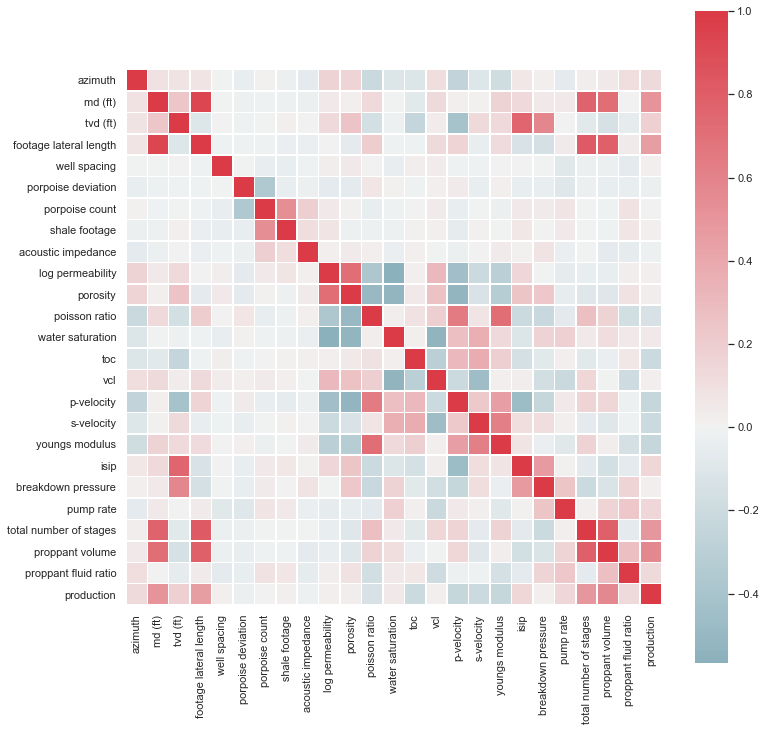

In [10]:
# Plot corrolation heatmap
print("matplotlib version " + matplotlib.__version__)
print("seaborn version " + sns.__version__)
sns.set(style='white')

corr = df.corr()

plt.figure(figsize=(12,12))
sns.set(font_scale=1)
sns.heatmap(data=corr,
            center=0,
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            square=True, linewidth=0.5)

(0.0, 9320.8993462505)

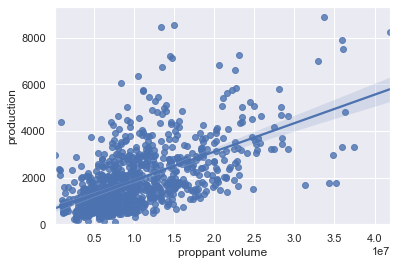

In [11]:
# proppant volume as potential predictor variable of production
sns.regplot(x="proppant volume", y="production", data=df)
plt.ylim(0,)

In [12]:
df[["proppant volume","production"]].corr()

,proppant volume,production
proppant volume,1.000000,0.573235
production,0.573235,1.000000


(0.0, 9320.8993462505)

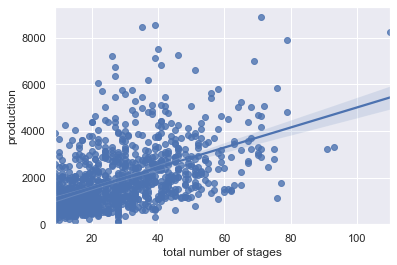

In [13]:
#  total number of stages as potential predictor variable of production
sns.regplot(x="total number of stages", y="production", data=df)
plt.ylim(0,)

In [14]:
df[["total number of stages","production"]].corr()

,total number of stages,production
total number of stages,1.000000,0.493335
production,0.493335,1.000000


(0.0, 9320.8993462505)

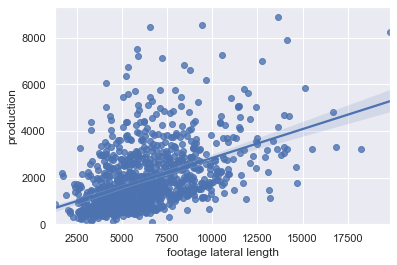

In [15]:
# footage lateral length as potential predictor variable of production
sns.regplot(x="footage lateral length", y="production", data=df)
plt.ylim(0,)

In [16]:
df[["footage lateral length","production"]].corr()


,footage lateral length,production
footage lateral length,1.000000,0.460939
production,0.460939,1.000000


(0.0, 9320.8993462505)

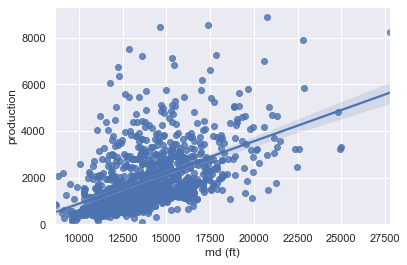

In [17]:
# md (ft) as potential predictor variable of production
sns.regplot(x="md (ft)", y="production", data=df)
plt.ylim(0,)

In [18]:
df[["md (ft)","production"]].corr()


,md (ft),production
md (ft),1.00000,0.51144
production,0.51144,1.00000


## 1.3 Understanding the String Objects Relation to Production

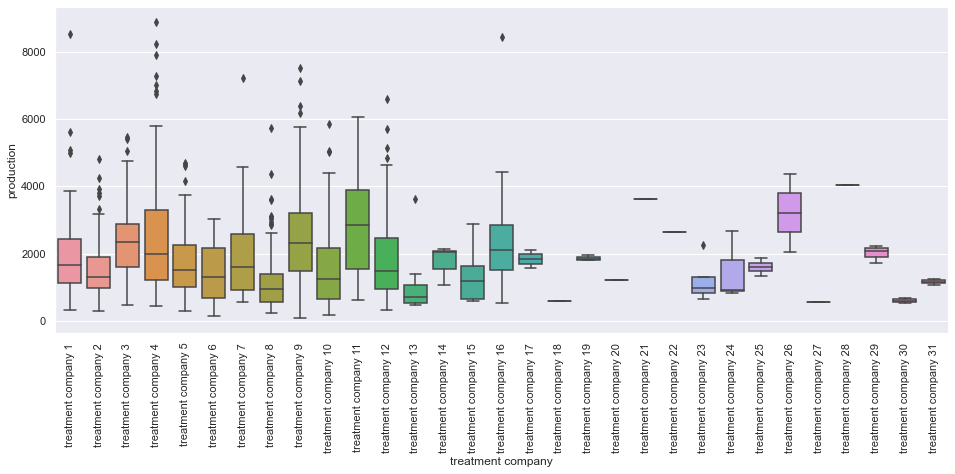

In [19]:
plt.figure(figsize=(16,6))
graph = sns.boxplot(x="treatment company", y="production", data=df)
loc, labels = plt.xticks()
a = graph.set_xticklabels(labels, rotation=90)

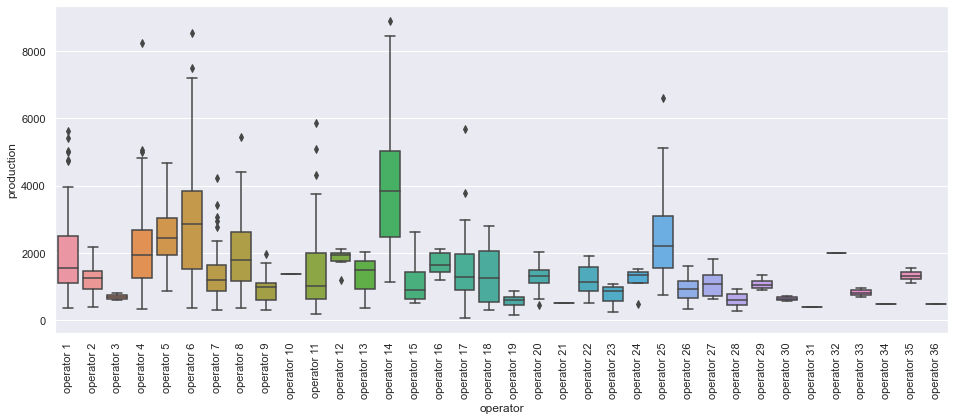

In [20]:
plt.figure(figsize=(16,6))
graph = sns.boxplot(x="operator", y="production", data=df)
loc, labels = plt.xticks()
a = graph.set_xticklabels(labels, rotation=90)

## 1.4 Understanding Production on Different Time Frames

In [21]:
df['date on production']


0       3/1/2018
1       7/1/2014
2       8/1/2018
3       1/1/2012
4       1/1/2012
         ...    
995     8/1/2017
996     3/1/2018
997    10/1/2018
998     8/1/2018
999     1/1/2014
Name: date on production, Length: 1000, dtype: object

In [22]:
# Convert string object to datetime
df['date on production'] = pd.to_datetime(df['date on production'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   treatment company       1000 non-null   object        
 1   azimuth                 945 non-null    float64       
 2   md (ft)                 1000 non-null   int64         
 3   tvd (ft)                980 non-null    float64       
 4   date on production      1000 non-null   datetime64[ns]
 5   operator                1000 non-null   object        
 6   footage lateral length  1000 non-null   float64       
 7   well spacing            844 non-null    float64       
 8   porpoise deviation      1000 non-null   float64       
 9   porpoise count          1000 non-null   int64         
 10  shale footage           1000 non-null   int64         
 11  acoustic impedance      1000 non-null   float64       
 12  log permeability        1000 non-null   float64  

In [23]:
# Monthly production 
df['month'] = df['date on production'].dt.month


Text(0.5, 0, 'Month')

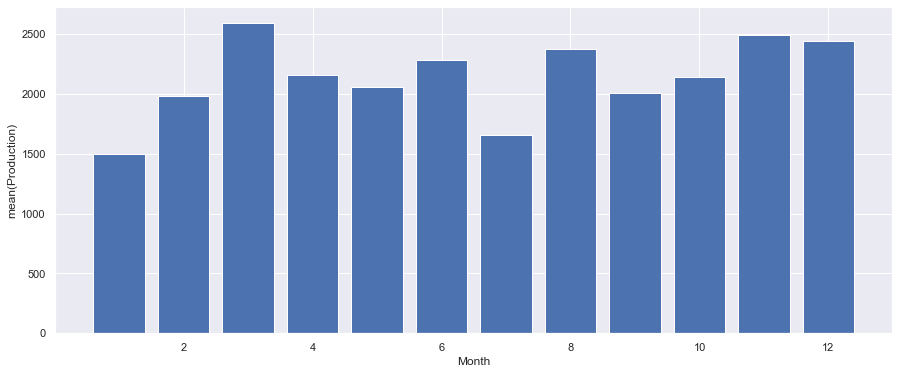

In [24]:
# Plot production by month
df_monthly_mean = df.groupby(by="month").mean()
plt.figure(figsize=(15,6))

plt.bar(df_monthly_mean.index, height=df_monthly_mean['production'].values)
plt.ylabel('mean(Production)')
plt.xlabel('Month')

In [25]:
# Annual production
df['year'] = df['date on production'].dt.year

Text(0.5, 0, 'Year')

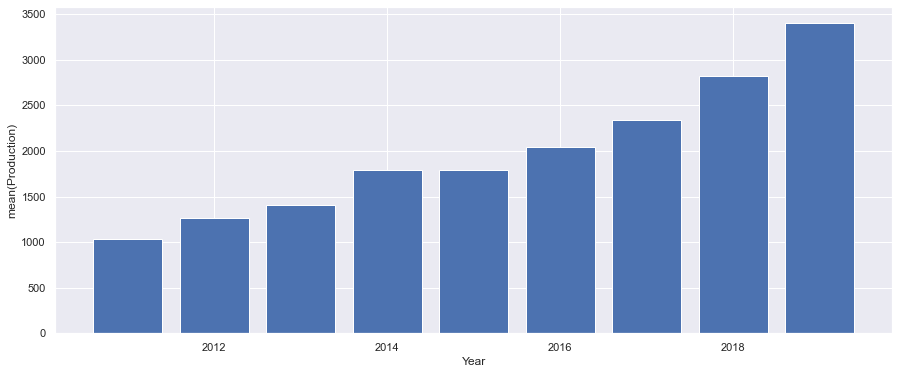

In [26]:
# Plot production by year
df_monthly_mean = df.groupby(by="year").mean()
plt.figure(figsize=(15,6))

plt.bar(df_monthly_mean.index, height=df_monthly_mean['production'].values)
plt.ylabel('mean(Production)')
plt.xlabel('Year')

In [27]:
# dropping 'date on production' and 'year' columns
df.drop(columns=['date on production', 'year','month'], inplace=True)


# 2. Data Cleaning

## 2.1 Treating null values in dataframe

In [28]:
df.isnull().mean().sort_values(ascending=True)

treatment company         0.000
total number of stages    0.000
pump rate                 0.000
s-velocity                0.000
p-velocity                0.000
vcl                       0.000
proppant fluid ratio      0.000
log permeability          0.000
acoustic impedance        0.000
poisson ratio             0.000
porpoise count            0.000
md (ft)                   0.000
shale footage             0.000
operator                  0.000
footage lateral length    0.000
production                0.000
porpoise deviation        0.000
youngs modulus            0.019
tvd (ft)                  0.020
toc                       0.021
azimuth                   0.055
isip                      0.077
porosity                  0.119
proppant volume           0.132
well spacing              0.156
water saturation          0.577
breakdown pressure        0.744
dtype: float64

In [29]:
#Dropping columns which have more than 30% null values
df= df.drop(columns=['breakdown pressure','water saturation'])

In [30]:
df.shape

(1000, 25)

In [31]:
#Imputing columns with less than 30% null values
df = df.fillna(df.mean())

In [32]:
df.isnull().mean().sort_values(ascending=True)


treatment company         0.0
proppant volume           0.0
total number of stages    0.0
pump rate                 0.0
isip                      0.0
youngs modulus            0.0
s-velocity                0.0
p-velocity                0.0
vcl                       0.0
toc                       0.0
poisson ratio             0.0
proppant fluid ratio      0.0
porosity                  0.0
acoustic impedance        0.0
shale footage             0.0
porpoise count            0.0
porpoise deviation        0.0
well spacing              0.0
footage lateral length    0.0
operator                  0.0
tvd (ft)                  0.0
md (ft)                   0.0
azimuth                   0.0
log permeability          0.0
production                0.0
dtype: float64

## 2.2 One hot encoding for string objects

In [33]:
#Understand number of values that each treatment company includes
df['treatment company'].value_counts()

treatment company 1     130
treatment company 10    120
treatment company 12    116
treatment company 4     113
treatment company 5      85
treatment company 8      77
treatment company 9      76
treatment company 2      71
treatment company 3      70
treatment company 11     30
treatment company 7      29
treatment company 16     23
treatment company 13      9
treatment company 6       9
treatment company 15      7
treatment company 23      5
treatment company 17      4
treatment company 14      3
treatment company 19      3
treatment company 29      3
treatment company 24      3
treatment company 31      2
treatment company 30      2
treatment company 26      2
treatment company 25      2
treatment company 20      1
treatment company 21      1
treatment company 27      1
treatment company 18      1
treatment company 28      1
treatment company 22      1
Name: treatment company, dtype: int64

In [34]:
#Grouping values with less frequency to "other" 

series = pd.value_counts(df["treatment company"])
mask = (series/series.sum() * 100).lt(2)

# To replace df['column'] use np.where I.e 
df['treatment company'] = np.where(df['treatment company'].isin(series[mask].index),'Other',df['treatment company'])

In [35]:
pd.value_counts(df["treatment company"])

treatment company 1     130
treatment company 10    120
treatment company 12    116
treatment company 4     113
treatment company 5      85
treatment company 8      77
treatment company 9      76
treatment company 2      71
treatment company 3      70
Other                    60
treatment company 11     30
treatment company 7      29
treatment company 16     23
Name: treatment company, dtype: int64

In [36]:
#Understand number of values that each operator includes
df['operator'].value_counts()

operator 4     133
operator 11    130
operator 1     106
operator 5      83
operator 6      73
operator 14     63
operator 8      53
operator 25     46
operator 7      46
operator 20     45
operator 2      40
operator 26     28
operator 9      23
operator 22     18
operator 17     16
operator 19     15
operator 13     13
operator 18     12
operator 15     10
operator 27      7
operator 16      6
operator 12      6
operator 29      4
operator 24      4
operator 23      3
operator 3       3
operator 33      2
operator 35      2
operator 28      2
operator 30      2
operator 32      1
operator 21      1
operator 31      1
operator 10      1
operator 36      1
operator 34      1
Name: operator, dtype: int64

In [37]:
#Grouping values with less frequency to "other" 

series = pd.value_counts(df.operator)
mask = (series/series.sum() * 100).lt(2)

# To replace df['column'] use np.where I.e 
df['operator'] = np.where(df['operator'].isin(series[mask].index),'Other',df['operator'])

In [38]:
#Frequency of each operator in the dataset
df['operator'].value_counts()

operator 4     133
Other          131
operator 11    130
operator 1     106
operator 5      83
operator 6      73
operator 14     63
operator 8      53
operator 25     46
operator 7      46
operator 20     45
operator 2      40
operator 26     28
operator 9      23
Name: operator, dtype: int64

In [39]:
#One hot ecoding of "treatment company" and "operator" 
df_dummies=pd.get_dummies(df, columns=['treatment company','operator'])

In [40]:
# dropping less important features
df_dummies.drop(columns=['porpoise count','shale footage','p-velocity','treatment company_Other',
'treatment company_treatment company 10','treatment company_treatment company 16','operator_operator 25', 'operator_operator 26',
 'operator_operator 4','operator_operator 8'], inplace=True)



In [41]:
# Selecting inputs and output 
y_name = 'production'
noise_f =" ,"
X_col = list(df_dummies.columns)
X_col.remove(y_name)

X = df_dummies[X_col]
y = df_dummies[y_name]

In [42]:
# Scaling X using StandarScaler 
std = StandardScaler()
X_scaled = std.fit_transform(X)

#Split data into train and test values
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

# 3. Predictive Modeling

## 3.1 Linear Regression

In [43]:
#Fitting model with Linear Regression
LRreg = LinearRegression()
LRreg.fit(X_train, y_train)

LinearRegression()

In [44]:
#Predicting y_test
y_predicted_lr = LRreg.predict(X_test)

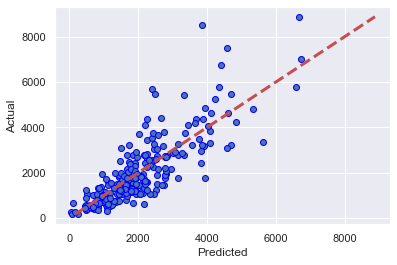

In [45]:
#Actual vs Predicted graph
fig, ax = plt.subplots()
ax.scatter(y_predicted_lr, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [46]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted_lr)
mse = metrics.mean_squared_error(y_test, y_predicted_lr)
r2 = metrics.r2_score(y_test, y_predicted_lr)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 579.9552692433948
MSE is 699675.2201269931
R2 score is 0.6811042086616106


## 3.2 SGDRegressor

In [47]:
#Fitting model with SGDRegressor
SGDreg=SGDRegressor()
SGDreg.fit(X_train, np.ravel(y_train))

SGDRegressor()

In [49]:
#Predicting y_test
y_predicted_sgd = SGDreg.predict(X_test)

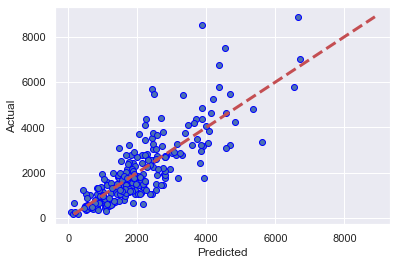

In [50]:
#Actual vs Predicted graph
fig, ax = plt.subplots()
ax.scatter(y_predicted_sgd, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [51]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted_sgd)
mse = metrics.mean_squared_error(y_test, y_predicted_sgd)
r2 = metrics.r2_score(y_test, y_predicted_sgd)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 581.6043034974475
MSE is 698721.8036800596
R2 score is 0.6815387538385351


## 3.3 Bayesian Regression

In [52]:
#Fitting model with Bayesian Regression
BRreg = linear_model.BayesianRidge()
BRreg.fit(X_train, y_train)
BayesianRidge()

BayesianRidge()

In [53]:
#Predicting y_test
y_predicted_br = BRreg.predict(X_test)

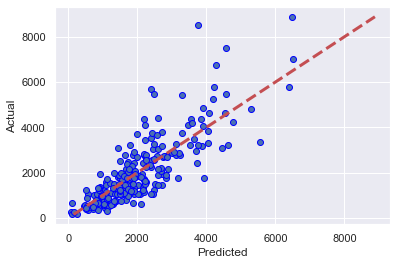

In [54]:
#Actual vs Predicted graph
fig, ax = plt.subplots()
ax.scatter(y_predicted_br, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [55]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted_br)
mse = metrics.mean_squared_error(y_test, y_predicted_br)
r2 = metrics.r2_score(y_test, y_predicted_br)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 583.2338553437253
MSE is 709838.005551723
R2 score is 0.6764722459923691


## 3.4 Ridge Regression 

In [56]:
#Fitting model with Ridge Regression 
from sklearn import linear_model
RRreg = linear_model.Ridge(alpha=.5)
RRreg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [57]:
#Predicting y_test
y_predicted_rr = RRreg.predict(X_test)

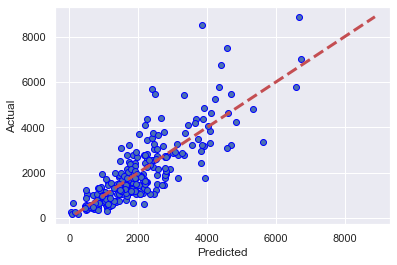

In [58]:
#Actual vs Predicted graph
fig, ax = plt.subplots()
ax.scatter(y_predicted_rr, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [59]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted_rr)
mse = metrics.mean_squared_error(y_test, y_predicted_rr)
r2 = metrics.r2_score(y_test, y_predicted_rr)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 580.0173578701704
MSE is 699836.0114174347
R2 score is 0.6810309237083484


## 3.5 Gradient Boosting Regression

In [60]:
#Fitting model with Gradient Boosting Regression

GBRreg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
mean_squared_error(y_test, GBRreg.predict(X_test))

873383.5649767893

In [61]:
#Predicting y_test
y_predicted_gbr = GBRreg.predict(X_test)

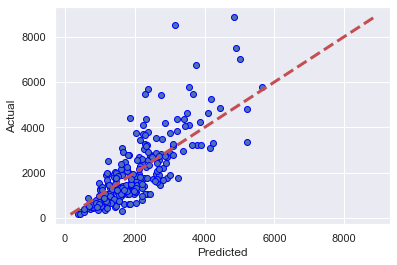

In [62]:
#Actual vs Predicted graph
fig, ax = plt.subplots()
ax.scatter(y_predicted_gbr, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [63]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted_gbr)
mse = metrics.mean_squared_error(y_test, y_predicted_gbr)
r2 = metrics.r2_score(y_test, y_predicted_gbr)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 657.3995363049467
MSE is 873383.5649767893
R2 score is 0.6019319605964251


## 3.6 Voting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import VotingRegressor

In [65]:
# Training classifiers


GB_reg = GradientBoostingRegressor(random_state=1)
LR_reg = LinearRegression()
RR_reg = linear_model.Ridge(alpha=.5)
BR_reg = linear_model.BayesianRidge()
SGD_reg= SGDRegressor()

#ereg = VotingRegressor(estimators=[('gb', GB_reg),  ('lr', LR_reg),,  ('rr', RR_reg),,  ('br', BR_reg),  ('sgd', SGD_reg)])
ereg = VotingRegressor([('gb', GB_reg),('lr', LR_reg), ('rr', RR_reg),  ('br', BR_reg),  ('sgd', SGD_reg)])
ereg.fit(X, y)

ereg = ereg.fit(X_train, y_train)
GB_reg=GB_reg.fit(X_train, y_train)
LR_reg=LR_reg.fit(X_train, y_train)
RR_reg=RR_reg.fit(X_train, y_train)
BR_reg=BR_reg.fit(X_train, y_train)
SGD_reg=SGD_reg.fit(X_train, y_train)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78921e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [66]:
xt = X_test[:10]

pred_GB = GB_reg.predict(xt)
pred_LR= LR_reg.predict(xt)
pred_RR = RR_reg.predict(xt)
pred_BR = BR_reg.predict(xt)
pred_SGD = SGD_reg.predict(xt)
pred_EREG = ereg.predict(xt)


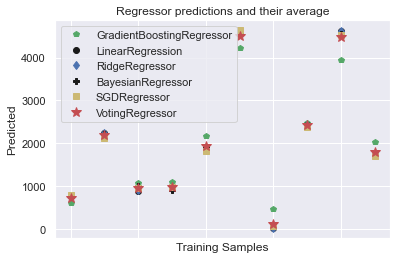

In [80]:
plt.figure()


plt.plot(pred_GB, 'gp', label='GradientBoostingRegressor')
plt.plot(pred_LR, 'ko', label='LinearRegression')
plt.plot(pred_RR, 'bd', label='RidgeRegressor')
plt.plot(pred_BR, 'kP', label='BayesianRegressor')
plt.plot(pred_SGD, 'ys', label='SGDRegressor')
plt.plot(pred_EREG, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Predicted')
plt.xlabel('Training Samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

In [68]:
y_predicted_vote = ereg.predict(X_test)

# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted_vote)
mse = metrics.mean_squared_error(y_test, y_predicted_vote)
r2 = metrics.r2_score(y_test, y_predicted_gbr)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 561.0991846923602
MSE is 665992.0806192901
R2 score is 0.6019319605964251
